###### ### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2024 Semester 1

## Assignment 1: Wine quality classification with K-NN


**Student ID(s):**     1288599


This iPython notebook is a template which you will use for your Assignment 1 submission.

**NOTE: YOU SHOULD ADD YOUR RESULTS, DIAGRAMS AND IMAGES FROM YOUR OBSERVATIONS IN THIS FILE TO YOUR REPORT (the PDF file).**

**Adding proper comments to your code is MANDATORY. **

## 1. K-NN classifier

In [90]:
import pandas as pd
import numpy as np
import math
from collections import Counter

# Split instances into features and labels
def get_X_y(train_df, test_df):
    X_train = train_df.drop('quality', axis=1)
    y_train = train_df['quality']
    X_test = test_df.drop('quality', axis=1)
    y_test = test_df['quality']
    return X_train, y_train, X_test, y_test

# Euclidean distance between a single test instance and all training instances using matrix
def euclidean_distance(train_matrix, test_array):
    
    # First get the difference between their attributes
    diff = train_matrix - test_array 
    
    # When a matrix multiply by its tranpose, the diagonal entries of the product is the sum of squares 
    # of the entries in each row of the original matrix
    diff_t = diff.transpose()
    SS_diff = (diff@diff_t).diagonal()
    
    # The euclidean distance is the square root of these sum of squares
    distances = [math.sqrt(distance) for distance in SS_diff]
    return distances

# Look at the votes from k nearest neighbours and decide the label of a test instance
def get_label(distances, y_train, k):
    
    # Get the k nearest distances first
    distance_df = pd.DataFrame(data=distances, columns=['distance'])
    nearest_dist = distance_df.sort_values(by=['distance'])[:k]
    
    # Look at their labels and count
    vote_count = Counter(y_train[nearest_dist.index])
    count_sort = vote_count.most_common()
    
    # Resolve tie in vote
    if len(count_sort) > 1 and (count_sort[0][1] == count_sort[1][1]):
        label = y_train[nearest_dist[:1].index]
    else:
        label = count_sort[0][0]
        
    return label

# Given the training data, predict labels for all test instances
def knn_predict(X_train, y_train, X_test, k):
    
    # Create a matrix of the features to do matrix calculation for distances
    train_matrix = X_train.to_numpy()
    test_matrix = X_test.to_numpy()
    
    n = len(train_matrix)
    predicted_labels = []
    
    # Calculate the distance to training data and decide the labels for each test row
    for test_instance in test_matrix:
        test_array = np.tile(test_instance, (n, 1)) # make a test row same dimension with the train matrix
        distances = euclidean_distance(train_matrix, test_array)
        predicted_labels.append(get_label(distances, y_train, k))
        
    return predicted_labels

train_df = pd.read_csv('winequality-train.csv')
test_df = pd.read_csv('winequality-test.csv')
X_train, y_train, X_test, y_test = get_X_y(train_df, test_df)

## 2. 1-NN classification

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

In [92]:
y_pred_knn = knn_predict(X_train, y_train, X_test, 1)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_knn)
print(accuracy)

0.7644444444444445


In [93]:
import matplotlib.pyplot as plt

def scatter_plot(df, feature_x, feature_y, title):

    # Take a subset of 200 training instances and split into low and high quality
    df_sample = df.sample(n=200, random_state=42)
    low_quality = df_sample[(df_sample['quality'] == 0)]
    high_quality = df_sample[(df_sample['quality'] == 1)]

    # Find column feature x and y
    x_low = low_quality[feature_x]
    y_low = low_quality[feature_y]
    x_high = high_quality[feature_x]
    y_high = high_quality[feature_y]

    # Draw plot
    plt.scatter(x_low, y_low, s=10, label='low')
    plt.scatter(x_high, y_high, s=10, label='high')

    # Add axis labels and titles
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title(title)
    plt.legend()

    plt.show()

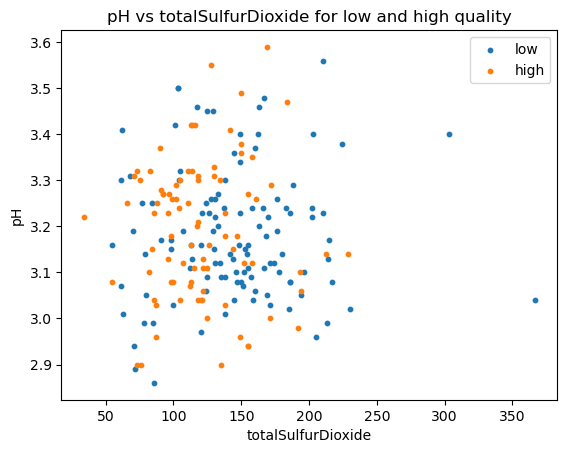

In [94]:
scatter_plot(train_df, 'totalSulfurDioxide', 'pH', title="pH vs totalSulfurDioxide for low and high quality")

## 3. Normalization

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

In [95]:
# Scale both training and test instances
def min_max_scaler(train_df, test_df):
    scaled_train = train_df.copy()
    scaled_test = test_df.copy()
    for column in train_df.columns:
        min_x = train_df[column].min()
        max_x = train_df[column].max()
        scaled_train[column] = (train_df[column] - min_x) / (max_x - min_x)
        scaled_test[column] = (test_df[column] - min_x) / (max_x - min_x)
    return scaled_train, scaled_test

# Standardize both training and test instances
def standardize(train_df, test_df):
    scaled_train = train_df.copy()
    scaled_test = test_df.copy()
    for column in train_df.columns:
        mean_x = train_df[column].mean()
        std_x = train_df[column].std()
        scaled_train[column] = (train_df[column] - mean_x) / std_x
        scaled_test[column] = (test_df[column] - mean_x) / std_x
    return scaled_train, scaled_test

# Apply min-max scaling and standardization
scaled_train, scaled_test = min_max_scaler(X_train, X_test)
standardized_train, standardized_test = standardize(X_train, X_test)

In [96]:
# 1-NN on scaled training and testing instances
y_pred_knn = knn_predict(scaled_train, y_train, scaled_test, 1)
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy of 1-NN on min-max scaled data:", accuracy)

Accuracy of 1-NN on min-max scaled data: 0.8503703703703703


In [97]:
# 1-NN on standardized training and testing instances
y_pred_knn = knn_predict(standardized_train, y_train, standardized_test, 1)
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy of 1-NN on standardized data:", accuracy)

Accuracy of 1-NN on standardized data: 0.8674074074074074


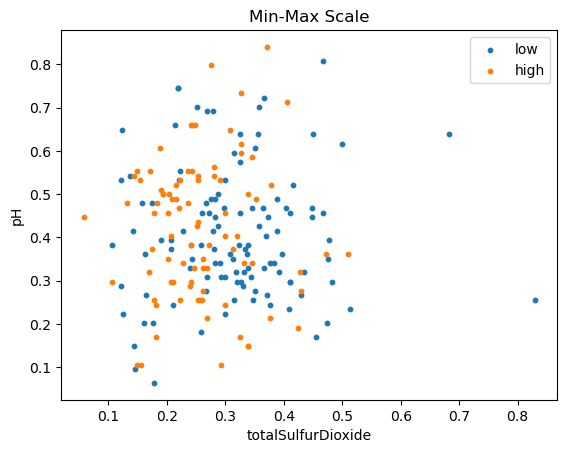

In [98]:
# Draw 2D scatter plot of scaled training instances
scaled_df = pd.concat([scaled_train, y_train], axis = 1)
scatter_plot(scaled_df, 'totalSulfurDioxide', 'pH', title="Min-Max Scale")

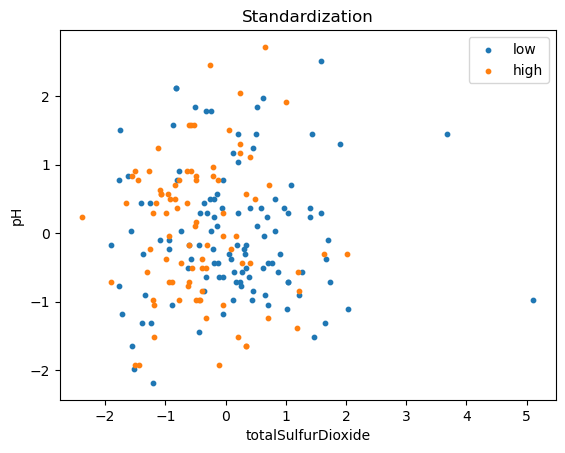

In [99]:
# Draw 2D scatter plot of standardized training instances
standardized_df = pd.concat([standardized_train, y_train], axis = 1)
scatter_plot(standardized_df, 'totalSulfurDioxide', 'pH', title="Standardization")

## 4. Model extensions

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

### 4.1
Compare the performance of your best 1-NN model from Question 3 to a Gaussian naive Bayes model on this dataset (you may use library functions to implement the Gaussian naive Bayes model). In your write-up, state the accuracy of the naive Bayes model and identify instances where the two models disagree. Why do the two models classify these instances differently?

In [100]:
# Implement Gaussian naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_nb = gnb.fit(X_train, y_train).predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Gaussian naive Bayes:", accuracy)

Accuracy of Gaussian naive Bayes: 0.7777777777777778


In [102]:
disagreements = []

# Find and store the index of the test instance where the models disagree
for i in range(len(X_test)): 
    if y_pred_knn[i] != y_pred_nb[i]:
        disagreements.append(i)

# Print out all the identified instances and predictions from 2 models together with the correct label
for idx in disagreements:
    print("Instance:", X_test.iloc[idx])
    print("Correct label:", y_test.iloc[idx])
    print("1NN Prediction:", y_pred_knn[idx])
    print("Gaussian naive Bayes Prediction:", y_pred_nb[idx])
    print("\n")

Instance: fixedAcidity           8.1000
volatileAcidity        0.2700
citricAcid             0.4100
residualSugar          1.4500
chlorides              0.0330
freeSulfurDioxide     11.0000
totalSulfurDioxide    63.0000
density                0.9908
pH                     2.9900
sulphates              0.5600
alcohol               12.0000
Name: 0, dtype: float64
Correct label: 0
1NN Prediction: 0
Gaussian naive Bayes Prediction: 1


Instance: fixedAcidity           6.200
volatileAcidity        0.160
citricAcid             0.330
residualSugar          1.100
chlorides              0.057
freeSulfurDioxide     21.000
totalSulfurDioxide    82.000
density                0.991
pH                     3.320
sulphates              0.460
alcohol               10.900
Name: 9, dtype: float64
Correct label: 1
1NN Prediction: 0
Gaussian naive Bayes Prediction: 1


Instance: fixedAcidity            7.4000
volatileAcidity         0.2500
citricAcid              0.3700
residualSugar          13.5000
chlor

Instance: fixedAcidity            6.30000
volatileAcidity         0.22000
citricAcid              0.28000
residualSugar           2.40000
chlorides               0.04200
freeSulfurDioxide      38.00000
totalSulfurDioxide    102.00000
density                 0.98998
pH                      3.14000
sulphates               0.37000
alcohol                11.60000
Name: 991, dtype: float64
Correct label: 1
1NN Prediction: 0
Gaussian naive Bayes Prediction: 1


Instance: fixedAcidity            7.50000
volatileAcidity         0.20000
citricAcid              0.41000
residualSugar           1.20000
chlorides               0.05000
freeSulfurDioxide      26.00000
totalSulfurDioxide    131.00000
density                 0.99133
pH                      3.19000
sulphates               0.52000
alcohol                11.10000
Name: 1001, dtype: float64
Correct label: 0
1NN Prediction: 0
Gaussian naive Bayes Prediction: 1


Instance: fixedAcidity            6.70000
volatileAcidity         0.22000
citri

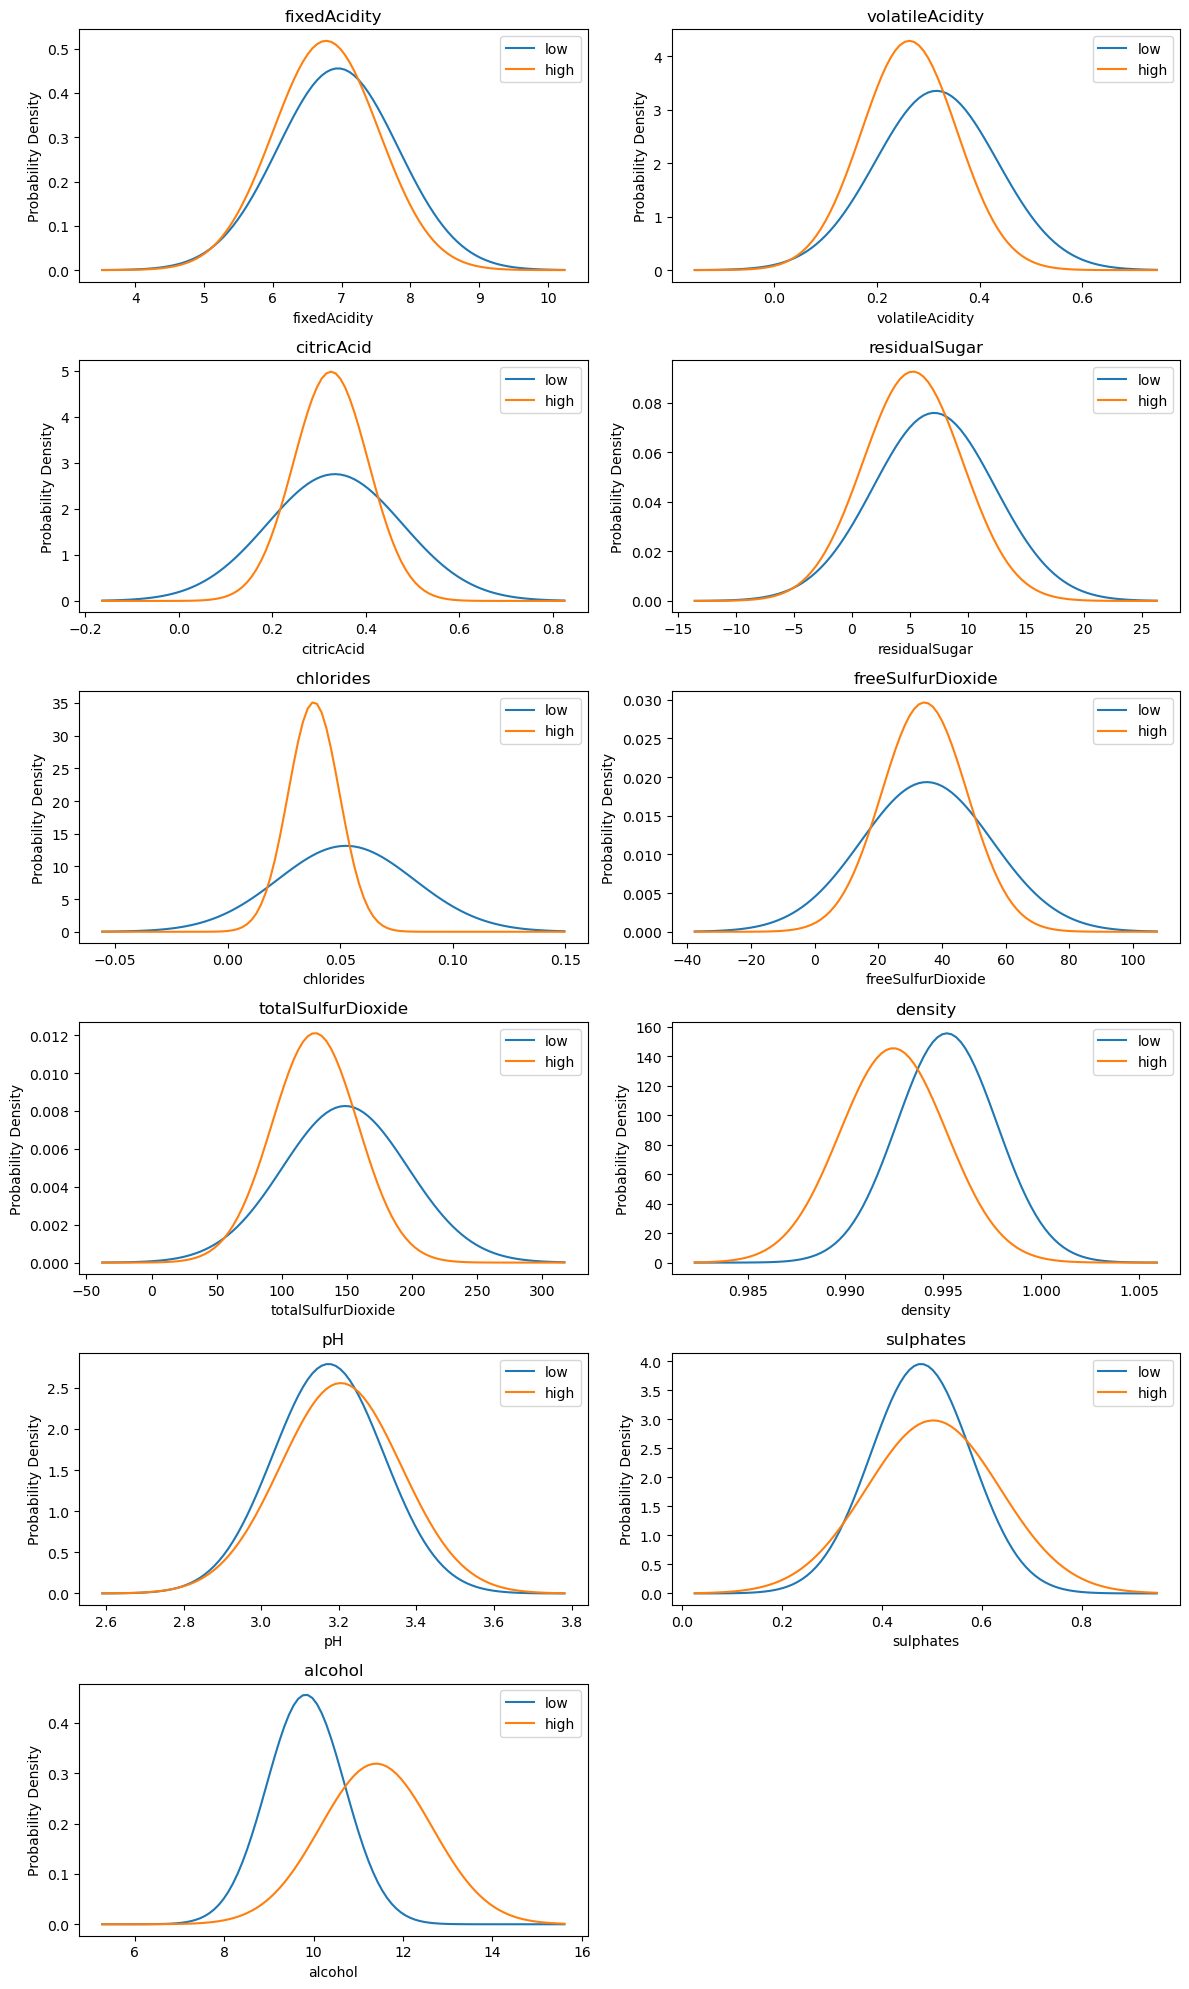

In [103]:
# Drawing the Gaussian distribution of each attribute conditioned on the class

low_quality = train_df[(train_df['quality'] == 0)].drop('quality', axis=1)
high_quality = train_df[(train_df['quality'] == 1)].drop('quality', axis=1)

# Create a grid of plot, each plot for 1 attribute distribution
fig, axs = plt.subplots(6, 2, figsize=(12, 20))

# Flatten the array of axes to iterate over it easily
axs = axs.flatten()

# Iterate through each attribute and draw Gaussian distribution 
for i, column in enumerate(X_train.columns):
    # Create an array of suitable x values based on the mean and std of that column, not conditioned on class
    mean_i = X_train[column].mean()
    std_i = X_train[column].std()
    x_values = np.linspace(mean_i - 4 * std_i, mean_i + 4 * std_i, 100)
    
    # Calculate the parameters needed for Gaussian distribution, low and high quality separately
    mean_low = low_quality[column].mean()
    std_low = low_quality[column].std()
    
    mean_high = high_quality[column].mean()
    std_high = high_quality[column].std()
    
    # Using the formula of Gaussian distribution for low quality using its parameters
    y_values1 = (1 / (std_low * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_values - mean_low) / std_low)**2)
    
    # Using the formula of Gaussian distribution for high quality using its parameters
    y_values2 = (1 / (std_high * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_values - mean_high) / std_high)**2)
    
    # Draw the distribution of the attribute to its plot in the grid, low and high on the same plot
    axs[i].plot(x_values, y_values1, label='low')
    axs[i].plot(x_values, y_values2, label='high')
    
    axs[i].set_title(column)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Probability Density')
    axs[i].legend()

# Hide any unused subplots
for ax in axs[len(X_train.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [104]:
# Find common instances betweenn training and test set
same_instances = pd.merge(X_train, X_test, how='inner')
same_idx = []

# Find which of these common instances appear in disagreements between 2 models
for idx in disagreements:
    in_df = same_instances.eq(X_test.iloc[idx]).all(axis=1).any()
    if in_df:
        same_idx.append(idx)
print("Number of common instances in disagreements:", len(same_idx))
for idx in same_idx:
    print("Instance:", X_test.iloc[idx])
    print("Correct label:", y_test.iloc[idx])
    print("1NN Prediction:", y_pred_knn[idx])
    print("Gaussian naive Bayes Prediction:", y_pred_nb[idx])
    print("\n")

Number of common instances in disagreements: 59
Instance: fixedAcidity            6.5000
volatileAcidity         0.2400
citricAcid              0.3200
residualSugar           7.6000
chlorides               0.0380
freeSulfurDioxide      48.0000
totalSulfurDioxide    203.0000
density                 0.9958
pH                      3.4500
sulphates               0.5400
alcohol                 9.7000
Name: 29, dtype: float64
Correct label: 1
1NN Prediction: 1
Gaussian naive Bayes Prediction: 0


Instance: fixedAcidity            7.5000
volatileAcidity         0.2700
citricAcid              0.3600
residualSugar           7.0000
chlorides               0.0360
freeSulfurDioxide      45.0000
totalSulfurDioxide    164.0000
density                 0.9939
pH                      3.0300
sulphates               0.3300
alcohol                11.0000
Name: 57, dtype: float64
Correct label: 0
1NN Prediction: 0
Gaussian naive Bayes Prediction: 1


Instance: fixedAcidity            7.2000
volatileAcidity

### 4.2
Implement two additional distance measures for your K-NN model: cosine similarity and Mahalanobis distance (you may use library functions for these distance measures). Do 1-NN classification using each of these new distance measures and the three normalization options from Question 3. Discuss how the new distance metrics compare to Euclidean distance and how each metric is affected by normalization.

### 4.3
Implement either of the two K-NN weighting strategies discussed in lecture (inverse linear distance or inverse distance). Compare the performance of the weighted and majority vote models for a few different values of K. In your write-up, discuss how weighting strategy and the value of K affect the model's decisions.

### 4.4
Measure the empirical distribution of class labels in the training dataset (what percentage of the training data comes from each class). Then evaluate the distribution of labels predicted by your K-NN model for the test data, for a range of values for K. Does the class distribution of the predicted labels match the class distribution of the training data? Explain why or why not.